# Project 2: Diet and Disease

In this project, you will investigate the major causes of death in the world, as well as how one of these causes, heart disease, might be linked to diet!

### Logistics


**Deadline.** This project is due at 11:59pm on Friday, 11/2. It's **much** better to be early than late, so start working now.

**Checkpoint.** For full credit, you must also complete the questions up until the end of Part 2 and submit them by 11:59pm on Friday, 10/26. You will have some lab time to work on these questions, but we recommend that you start the project before lab and leave time to finish the checkpoint afterward.

**Partners.** You may work with one other partner. Your partner must be enrolled in the same lab as you are. Only one of you is required to submit the project. On [okpy.org](http://okpy.org), the person who submits should also designate their partner so that both of you receive credit.

**Rules.** Don't share your code with anybody but your partner. You are welcome to discuss questions with other students, but don't share the answers. The experience of solving the problems in this project will prepare you for exams (and life). If someone asks you for the answer, resist! Instead, you can demonstrate how you would solve a similar problem.

**Support.** You are not alone! Come to office hours, post on Piazza, and talk to your classmates. If you want to ask about the details of your solution to a problem, make a private Piazza post and the staff will respond. If you're ever feeling overwhelmed or don't know how to make progress, email your TA or tutor for help. You can find contact information for the staff on the [course website](http://data8.org/fa18/staff.html).

**Tests.** Passing the tests for a question **does not** mean that you answered the question correctly. Tests usually only check that your table has the correct column labels. However, more tests will be applied to verify the correctness of your submission in order to assign your final score, so be careful and check your work!

**Advice.** Develop your answers incrementally. To perform a complicated table manipulation, break it up into steps, perform each step on a different line, give a new name to each result, and check that each intermediate result is what you expect. You can add any additional names or functions you want to the provided cells. 

All of the concepts necessary for this project are found in the textbook. If you are stuck on a particular problem, reading through the relevant textbook section often will help clarify the concept.

To get started, load `datascience`, `numpy`, `plots`, and `ok`.

In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
np.set_printoptions(legacy='1.13')

from client.api.notebook import Notebook
ok = Notebook('project2.ok')
_ = ok.auth(inline=True)

Assignment: Project 2: Diet and Disease
OK, version v1.12.5

Successfully logged in as kevinyu22@berkeley.edu


# Diet and Cardiovascular Disease

Death and its many causes are often a disconcerting topic for polite conversation. However, the more we know about it, the better equipped we are to prevent our early demise. As the acclaimed Professor Albus Dumbledore once said, "After all, to the well-organized mind, death is but the next great adventure."

In the following analysis, we will investigate the world's most dangerous killer: Cardiovascular Disease. Your investigation will take you across decades of medical research, and you'll look at multiple causes and effects across two different studies.

Here is a roadmap for this project:

* In Part 1, we'll investigate the major causes of death in the world during the past century (from 1900 to 2015).
* In Part 2, we'll look at data from the Framingham Heart Study, an observational study into cardiovascular health.
* In Part 3, we'll examine the clinical trials from the Minnesota Coronary Experiment and introduce our second dataset.
* In Part 4, we'll run a hypothesis test on our observed data from the Minnesota Coronary Experiment.
* In Part 5, we'll conclude the experiment and reflect on what we've learned about the relationship between diet and cardiovascular disease.

## Part 1: Causes of Death 

In order to get a better idea of how we can most effectively prevent deaths, we need to first figure out what the major causes of death are. Run the following cell to read in and view the `causes_of_death` table, which documents the death rate for major causes of deaths over the last century (1900 until 2015).

In [3]:
causes_of_death = Table.read_table('causes_of_death.csv')
causes_of_death.show(10)

Year,Cause,Age Adjusted Death Rate
2015,Heart Disease,168.5
2015,Cancer,158.5
2015,Stroke,37.6
2015,Accidents,43.2
2015,Influenza and Pneumonia,15.2
2014,Heart Disease,167
2014,Cancer,161.2
2014,Stroke,36.5
2014,Accidents,40.5
2014,Influenza and Pneumonia,15.1


Each entry in the column **Age Adjusted Death Rate** is a death rate for a specific **Year** and **Cause** of death. 

The **Age Adjusted** specification in the death rate column tells us that the values shown are the death rates that would have existed if the population under study in a specific year had the same age distribution as the "standard" population, a baseline. This is so we can compare ages across years without worrying about changes in the demographics of our population.

**Question 1:** What are all the different causes of death in this dataset? Assign an array of all the unique causes of death to `all_unique_causes`.

In [4]:
all_unique_causes = causes_of_death.group('Cause').column('Cause')
sorted(all_unique_causes)

['Accidents', 'Cancer', 'Heart Disease', 'Influenza and Pneumonia', 'Stroke']

In [5]:
_ = ok.grade('q1_1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 2:** We would like to plot the death rate for each disease over time. To do so, we must create a table with one column for each cause and one row for each year.

Create a table called `causes_for_plotting`. It should have one column called `Year`, and then a column with age-adjusted death rates for each of the causes you found in Question 1. There should be as many of these columns in `causes_for_plotting` as there are causes in Question 1.

*Hint*: Use `pivot`, and think about how the `elem` function might be useful in getting the **Age Adjusted Death Rate** for each cause and year combination.

In [6]:
causes_for_plotting = causes_of_death.pivot('Cause','Year','Age Adjusted Death Rate', elem)
causes_for_plotting

NameError: name 'elem' is not defined

In [7]:
def elem(x):
    return x.item(0)

In [8]:
def identity(x):
    return x

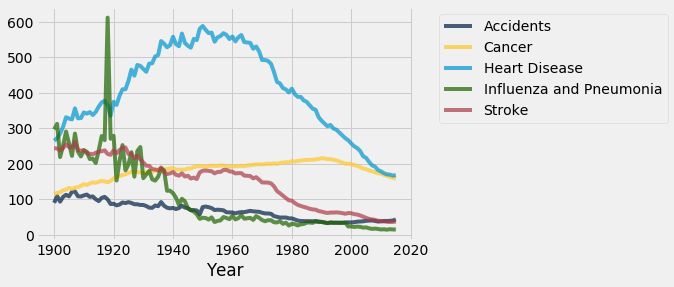

In [9]:
causes_for_plotting = causes_of_death.pivot('Cause','Year','Age Adjusted Death Rate', elem)

# Do not change this line
causes_for_plotting.plot('Year')

Let's examine the graph above. You'll see that in the 1960s, the death rate due to heart disease steadily declines. Up until then, the effects of smoking, blood pressure, and diet on the cardiovascular system were unknown to researchers. Once these factors started to be noticed, doctors were able recommend a lifestyle change for at-risk patients to prevent heart attacks and heart problems.

Note, however, that the death rate for heart disease is still higher than the death rates of all other causes. Even though the death rate is starkly decreasing, there's still a lot we don't understand about the causes (both direct and indirect) of heart disease.

## Part 2: The Framingham Heart Study

The [Framingham Heart Study](https://en.wikipedia.org/wiki/Framingham_Heart_Study) is an observational study of cardiovascular health. The initial study followed over 5,000 volunteers for several decades, and followup studies even looked at their descendants. In this section, we'll investigate some of its key findings about diet, cholesterol, and heart disease.

Run the cell below to examine data for almost 4,000 subjects from the first wave of the study, collected in 1956.

In [10]:
framingham = Table.read_table('framingham.csv')
framingham

AGE,SYSBP,DIABP,TOTCHOL,CURSMOKE,DIABETES,GLUCOSE,DEATH,ANYCHD
39,106,70,195,0,0,77,0,1
46,121,81,250,0,0,76,0,0
48,127.5,80,245,1,0,70,0,0
61,150,95,225,1,0,103,1,0
46,130,84,285,1,0,85,0,0
43,180,110,228,0,0,99,0,1
63,138,71,205,0,0,85,0,1
45,100,71,313,1,0,78,0,0
52,141.5,89,260,0,0,79,0,0
43,162,107,225,1,0,88,0,0


Each row contains data from one subject. The first seven columns describe the subject at the time of their initial medical exam at the start of the study. The last column, `ANYCHD`, tells us whether the subject developed some form of heart disease at any point after the start of the study.

You may have noticed that the table contains fewer rows than subjects in the original study: this is because we are excluding subjects who already had heart disease as well as subjects with missing data.

### Section 1: Diabetes and the population

Before we begin our investigation into cholesterol, we'll first look at some limitations of this dataset. In particular, we will investigate ways in which this is or isn't a representative sample of the population by examining the number of subjects with diabetes.

[According to the CDC](https://www.cdc.gov/diabetes/statistics/slides/long_term_trends.pdf), the prevalence of diagnosed diabetes (i.e., the percentage of the population who have it) in the U.S. around this time was 0.93%. We are going to conduct a hypothesis test with the following null and alternative hypotheses:

**Null Hypothesis**: The probability that a participant within the Framingham Study has diabetes is equivalent to the prevalence of diagnosed diabetes within the population. (i.e., any difference is due to chance).

**Alternative Hypothesis**: The probability that a participant within the Framingham Study has diabetes is different than the prevalence of diagnosed diabetes within the population.

We are going to use the absolute distance between the observed prevalence and the true population prevalence as our test statistic. The column `DIABETES` in the `framingham` table contains a 1 for subjects with diabetes and a `0` for those without.

**Question 1**: What is the observed value of the statistic in the data from the Framingham Study? You should convert prevalences to proportions before calculating the statistic!

In [11]:
observed_diabetes_distance = abs(np.count_nonzero(framingham.column('DIABETES'))/len(framingham.column('DIABETES'))-.0093)
observed_diabetes_distance

0.01802951587714732

In [12]:
_ = ok.grade('q2_1_1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 2**: The array `diabetes_proportions` contains the proportions of the population without and with diabetes. Complete the following code to simulate 5000 values of the statistic under the null hypothesis.

In [13]:
diabetes_proportions = make_array(.9907, .0093)

diabetes_simulated_stats = make_array()

for i in np.arange(5000):
    simulated_stat = sample_proportions(4000, diabetes_proportions).item(1)
    diabetes_simulated_stats = np.append(diabetes_simulated_stats,simulated_stat)
    
diabetes_simulated_stats

array([ 0.00875,  0.009  ,  0.009  , ...,  0.01025,  0.00925,  0.00975])

In [14]:
_ = ok.grade('q2_1_2')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 3**: Run the following cell to generate a histogram of the simulated values of your statistic, along with the observed value.

*Make sure to run the cell that draws the histogram, since it will be graded.*

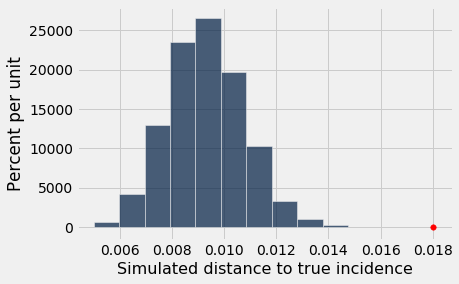

In [15]:
Table().with_column('Simulated distance to true incidence', diabetes_simulated_stats).hist()
plots.scatter(observed_diabetes_distance, 0, color='red', s=30)

In [16]:
np.count_nonzero(framingham.column('DIABETES'))/len(framingham.column('DIABETES'))

0.02732951587714732

**Question 4**: Based on the results of the test and the empirical distribution of the test statistic under the null, should you reject the null hypothesis?

We would reject the null hypothesis because the observed value of the test statistic is far off from the histogram of simulated values under the null hypothesis. The observed value likely gives a p-value far below 5% or even 1%, and thus the null can be discarded.

**Question 5**: You know that the study was well-designed to represent the population. Why might there be a difference between the population and the sample? Assign the name `framingham_diabetes_explanations` to a list of the following explanations that **are possible and consistent** with the observed data and hypothesis test results.

1. Healthy (non-diabetic) people are more likely to volunteer for the study.
2. Diabetes was under-diagnosed in the population (i.e., there were a lot of people in the population who had diabetes but weren't diagnosed).
3. The relatively wealthy population in Framingham ate a luxurious diet high in sugar (high-sugar diets are a known cause of diabetes).
4. The Framingham Study subjects were older on average than the general population, and therefore more likely to have diabetes.


In [17]:
np.count_nonzero(framingham.column('DIABETES'))/len(framingham.column('DIABETES'))

0.02732951587714732

In [18]:
framingham_diabetes_possibilities = [2,3,4]
framingham_diabetes_possibilities

[2, 3, 4]

In [19]:
_ = ok.grade('q2_1_5')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



In real-world studies, getting a truly representative random sample of the population is often incredibly difficult. Even just to accurately represent all Americans, a truly random sample would need to examine people across geographical, socioeconomic, community, and class lines (just to name a few). For a study like this, scientists would also need to make sure the medical exams were standardized and consistent across the different people being examined. In other words, there's a tradeoff between taking a more representative random sample and the cost of collecting all the data from the sample.

The Framingham study collected high-quality medical data from its subjects, even if the subjects may not be a perfect representation of the population of all Americans. This is a common issue that data scientists face: while the available data aren't perfect, they're the best we have. The Framingham study is generally considered the best in its class, so we'll continue working with it while keeping its limitations in mind.

(For more on representation in medical study samples, you can read these recent articles from [NPR](https://www.npr.org/sections/health-shots/2015/12/16/459666750/clinical-trials-still-dont-reflect-the-diversity-of-america) and [Scientific American](https://www.scientificamerican.com/article/clinical-trials-have-far-too-little-racial-and-ethnic-diversity/)).

### Section 2: Cholesterol and Heart Disease

In the remainder of this question, we are going to examine one of the main findings of the Framingham study: an association between serum cholesterol (i.e., how much cholesterol is in someone's blood) and whether or not that person develops heart disease.

We'll use the following null and alternative hypotheses:

**Null Hypothesis:** In the population, the distribution of cholesterol levels among those who get heart disease is the same as the distribution of cholesterol levels
among those who do not.

**Alternative Hypothesis:** The cholesterol levels of people in the population who get
heart disease are higher, on average, than the cholesterol level of people who do not.

**Question 1:** From the provided Null and Alternative Hypotheses, what seems more reasonable to use, A/B Testing or the Standard Hypothesis Testing? Assign the variable `reasonable_test` to one of the following choices. 

1. A/B Testing
2. Standard Hypothesis Test

In [20]:
reasonable_test = 1
reasonable_test

1

In [21]:
_ = ok.grade('q2_2_1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 2:** Now that we have a null hypothesis, we need a test statistic. Explain and justify your choice of test statistic in two sentences or less.

*Hint*: Remember that larger values of the test statistic should favor the alternative over the null.

**Test Statistic:** *The difference between the average cholesterol levels of people with diabetes and people without diabetes. This test statistic works because it measures the difference in cholesterol levels between people with heart disease and without heart disease and encapsulates all the values in each group with a mean. Through A/B testing, shuffling this table and testing the variability would contrast well with the observed test statistic.*

**Question 3**: Write a function that computes your test statistic. It should take a table with two columns, `TOTCHOL` and `ANYCHD`, and compute the test statistic you described above. 

In [22]:
def compute_framingham_test_statistic(tbl):
    mean_yes_CHD=np.mean(tbl.where('ANYCHD', are.equal_to(1)).column('TOTCHOL'))
    mean_no_CHD= np.mean(tbl.where('ANYCHD', are.equal_to(0)).column('TOTCHOL'))
    diff_means= mean_yes_CHD-mean_no_CHD
    return diff_means


In [23]:
_ = ok.grade('q2_2_3')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 4**: Use the function you defined above to compute the observed test statistic, and assign it to the name `framingham_observed_statistic`.

In [24]:
framingham_observed_statistic = compute_framingham_test_statistic(framingham)
framingham_observed_statistic

16.635919905689406

In [25]:
_ = ok.grade('q2_2_4')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Now that we have defined hypotheses and a test statistic, we are ready to conduct a hypothesis test. We'll start by defining a function to simulate the test statistic under the null hypothesis, and then use that function 1000 times to understand the distribution under the null hypothesis.

**Question 5**: Write a function to simulate the test statistic under the null hypothesis. 

The `simulate_framingham_null` function should simulate the null hypothesis once (not 1000 times) and return the value of the test statistic for that simulated sample.

In [26]:
def simulate_framingham_null():
    shuffled_frame = framingham.select("TOTCHOL").sample(with_replacement = False) #Shuffled total cholesterol because it is the main variable
    sim_table_frame = framingham.select("ANYCHD").with_column('TOTCHOL', shuffled_frame.column(0)) # Need to add the shuffled cholesterol to an unshuffled column of people with heart disease
    return compute_framingham_test_statistic(sim_table_frame)

In [27]:
# Run your function once to make sure that it works.
simulate_framingham_null()

-2.5423417655359799

In [28]:
_ = ok.grade('q2_2_5')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 6**: Fill in the blanks below to complete the simulation for the hypothesis test. Your simulation should compute 1000 values of the test statistic under the null hypothesis and store the result in the array framingham_simulated_stats.

*Hint*: You should use the function you wrote above in Question 3.

*Note*: Warning: running your code might take a few minutes!  We encourage you to check your `simulate_framingham_null()` code to make sure it works correctly before running this cell. 

In [29]:
framingham_simulated_stats = make_array()

for i in np.arange(1000):
    sim_stat = simulate_framingham_null()
    framingham_simulated_stats = np.append(framingham_simulated_stats, sim_stat)

The following line will plot the histogram of the simulated test statistics, as well as a point for the observed test statistic. Make sure to run it, as it will be graded. 

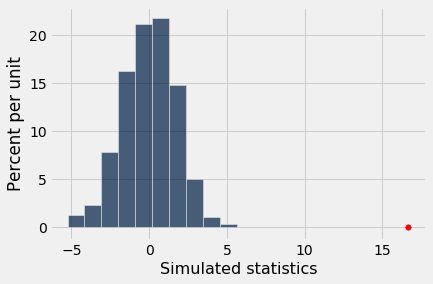

In [30]:
Table().with_column('Simulated statistics', framingham_simulated_stats).hist()
plots.scatter(framingham_observed_statistic, 0, color='red', s=30)

**Question 7**: Compute the p-value for this hypothesis test, and assign it to the name `framingham_p_value`.

*Hint*: One of the key findings of the Framingham study was a strong association between cholesterol levels and heart disease. If your p-value doesn't match up with this finding, you may want to take another look at your test statistic and/or your simulation.

In [31]:
framingham_p_value = np.count_nonzero(framingham_simulated_stats >= framingham_observed_statistic)/len(framingham_simulated_stats)
framingham_p_value

0.0

In [32]:
_ = ok.grade('q2_2_7')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 8**: Despite the Framingham Heart Study's reputation as a well-conducted and rigorous study, it has some major limitations. Give one specific reason why it can't be used to say that high cholesterol *causes* heart disease.


Observational studies like the Framingham study can't determine causality, even if they do their best to isolate cholesterol as the only difference between the subjects. Observational studies often have confounding factors, and the framingham study, and because the study relied on voluntary subjects, some subjects may not have given enough information, and the scientists couldn't filter out possible confounding factors as well. The scientists had no control over the subjects.

Similar studies from the 1950s found positive associations between diets high in saturated fat, high cholesterol, and incidence of heart disease. In 1962, the U.S. Surgeon General said:

*"Although there is evidence that diet and dietary habits may be implicated in the development of coronary heart disease and may be significant in its prevention or control, at present our only research evidence is associative and not conclusive."*

#### Congratulations, you have reached the checkpoint! Run the submit cell below to generate the checkpoint submission.

In [33]:
_ = ok.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'project2.ipynb'.
Submit... 100% complete
Submission successful for user: kevinyu22@berkeley.edu
URL: https://okpy.org/cal/data8/fa18/project2/submissions/oQ4JvL



## Part 3: Causality, the National Diet-Heart Study, and the Minnesota Coronary Experiment

To establish a causal link between saturated fat intake, serum cholesterol, and heart disease, a group of doctors in the US established the National Heart-Diet Study. The study was based in 6 centers: Baltimore, Boston, Chicago, Minneapolis-St. Paul, Oakland, and Faribault, MN. The first 5 centers recruited volunteers from the local population: volunteers and their families were asked to adjust their diet to include more or less saturated fat.

You may already have a strong intuition about what the doctors concluded in their findings, but the evidence from the trial was surprisingly complex.

**Question 1**: Why might the data from the National Heart-Diet Study not be enough to determine causality? Describe one specific limitation of the data from these first 5 centers in the study.

*Hint*: what is the main problem with fad diets?

Like a fad diet, the researchers can't force their subjects to adhere to the diet. The study doesn't work because the researchers can't control their samples beyond suggesting what their diets should be. Many of the subjects could have given up on the diet whenever the researchers weren't watching, tainting the treatment group. Thus, there is not conclusive evidence to establish causality.

The sixth center was organized by Dr. Ivan Frantz, and its study was known as the Minnesota Coronary Experiment. Dr. Frantz was a strong proponent of reducing saturated fats to prevent death from heart disease. He believed so strongly in the idea that he placed his household on a strict diet very low in saturated fats. The main difference between the Minnesota Coronary Experiment and the rest of the National Diet-Heart Study was the setting. While the other centers in the study looked at volunteers, Dr. Frantz conducted his study at Faribault State Hospital, which housed patients who were institutionalized due to disabilities or mental illness.

In this institution, the subjects were randomly divided into two equal groups: half of the subjects, the **control group**, were fed meals cooked with saturated fats, and the other half, the **diet group**, were fed meals cooked with polyunsaturated fats. For example, the diet group's oils were replaced with corn oils and their butter was replaced with margarine. The subjects did not know which food they were getting, to avoid any potential bias or placebo effect. This type of study is known as a **blind** study.

Although standards for informed consent in participation weren't as strict then as they are today, the study was described as follows:

*"No consent forms were required because the study diets were considered to be acceptable as house diets and the testing was considered to contribute to better patient care.  Prior to beginning the diet phase, the project was explained and sample foods were served. Residents were given the opportunity to decline participation."*

Despite the level of detail and effort in the study, the results of the study were never extensively examined until the late 21st century. Over 40 years after the data were collected, Dr. Christopher Ramsden heard about the experiment, and asked Dr. Frantz's son Robert to uncover the files in the Frantz family home's dusty basement. You can learn more about the story of how the data was recovered on the [Revisionist History podcast](http://revisionisthistory.com/episodes/20-the-basement-tapes) or in [Scientific American magazine](https://www.scientificamerican.com/article/records-found-in-dusty-basement-undermine-decades-of-dietary-advice/).

**Question 2:** While the data from such a study may be useful scientifically, it also raises major ethical concerns. Describe at least one ethical problem with the study conducted at Faribault State Hospital.

*Hint*: There isn't necessarily a single right or wrong answer to this question. If you're not sure, some areas of consideration may be the study organizers' selection of participants for the study, as well as their justification for not using consent forms. You could also ask yourself how the project might have been explained to the patients prior to the diet phase, and to what degree were they capable of consent.

The researchers did not use consent form, so that they could prevent placebos. However, any experimental trial requires consent, regardless of what the experiment could do. In addition, the researchers assumed that their proposed diets would not have adverse effects on the inmates, thus deciding not to give consent forms, even though they were testing to see what effects would occur from the diets.

In recent years, poor treatment of patients at Faribault State Hospital (and other similar institutions in Minnesota) has come to light: the state has recently [changed patients' gravestones from numbers to their actual names](https://www.tcdailyplanet.net/minnesota-saying-sorry-treatment-persons-disabilities/), and [apologized for inhumane treatment of patients](https://www.tcdailyplanet.net/minnesota-saying-sorry-treatment-persons-disabilities/).

Unfortunately, the data for each individual in the 1968 study is not available; only summary statistics are available.  Therefore, in this project we create artificial synthetic data, based on those summary statistics.

In order to test whether eating diet actually reduced serum cholesterol levels, we need to create a table with one row for each participant in the study, as well as how their serum cholesterol changed. There were 1179 subjects in the diet group and 1176 subjects in the control group who had their serum cholesterol changes measured. 

The study measured the serum cholesterol at the start and end of the study, then used this to compute the percentage change for each individual.  Then, they computed the average and standard deviation of these percentage changes for each study group. We have these summary statistics: for those who received the unsaturated fat diet, the serum cholestorol decreased by 13.8% on average, with a standard deviation of 13%.  For those in the control group, the percentage change decreased by 1% on average, with a standard deviation of 14.5%.  We used these statistics to generate random synthetic percentage change levels for each individual, making an assumption about the distribution fo these changes.  We have saved this data in `serum_cholesterol.csv`.  We read this table into `serum_cholesterol` below.

In [34]:
serum_cholesterol = Table.read_table('serum_cholesterol.csv')
serum_cholesterol

Condition,Change in Serum Cholesterol
Diet,-8.36662
Diet,-23.6885
Diet,-28.985
Diet,-10.9341
Diet,-17.9041
Diet,-11.7145
Diet,-13.6215
Diet,-2.2387
Diet,-2.03579
Diet,-13.5746


After determining if serum cholesterol is actually lowered by this new diet, we will see whether or not death rates were reduced as well. The following table is a summarized version of the data collected in the experiment. 

In [35]:
mortality_summary = Table.read_table('mortality_summary.csv')
mortality_summary

Age,Condition,Total,Deaths,CHD Deaths
0-34,Diet,1367,3,0
35-44,Diet,728,3,0
45-54,Diet,767,14,4
55-64,Diet,870,35,7
65+,Diet,953,190,42
0-34,Control,1337,7,1
35-44,Control,731,4,1
45-54,Control,816,16,4
55-64,Control,896,33,12
65+,Control,958,162,34


**Question 3:** The numbers of deaths in the Deaths column above are not specific to cardiovascular disease. For our tests, we are going to use the total number of deaths instead of the number of CHD deaths. If a hypothesis test shows that the rate of deaths in the diet group is different from the rate of deaths in the control group, which of the following are valid conclusions from the test? Assign the name `mortality_valid_conclusions` to a list of numbers.

1. Eating a diet rich in unsaturated fats causes an increased/decreased risk of death.
2. Eating a diet rich in unsaturated fats causes/prevents cardiovascular disease.
3. Lower cholesterol causes an increased/decreased risk of cardiovascular disease.
4. It is impossible to determine any causal relationship between any of these factors, even if the test shows an association.

In [36]:
mortality_valid_conclusions = [4]
mortality_valid_conclusions

[4]

In [37]:
_ = ok.grade('q3_3')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



To help with our simulations, we are going to expand the `mortality_summary` table so that we have one row for every subject in the experiment. Our goal is to put this into a table called `minnesota_data`.

**Question 4:** Using all of the notes below, complete the code below to create a table with four columns: "Age", "Condition", "Participated" and "Died". Each row should contain a specific patient and should have their age group and condition as specified in the `mortality_summary` table, a `True` in the "Participated" column since everyone participated in the experiment, and either a `True` or `False` in the "Died" column, depending on if they are alive or dead. 

The total number of rows of `minnesota_data` should be the same as the number of participants summarized in the mortality_summary table. 

*Hint*: The most useful notes from below will be the final three; how to get an item out of a row, passing in just one value into the second argument of `with_column`, and how to iterate over rows. Make sure you use the other two notes to understand what the rest of this code is doing.  

The following few notes will all be helpful to finish and understand the code below: 

* `tbl1.append(tbl2)` adds all of the rows of `tbl2` into `tbl1`, assuming they have the same column names 
* `np.arange(5) < 3` returns the following array: `[True, True, True, False, False]`
* `row.item(x)` returns the item in column `x` in a specific row of a table
*  If `my_table` has 10 rows. Then, `my_table.with_column('Num', val)` adds an array of length 10, with each element being val, as a new column of the table. 
*  To iterate over all rows of a table, you can write `for row in tbl.rows:`

In [38]:
minnesota_data = Table(['Age', 'Condition', 'Died', 'Participated'])

for row in mortality_summary.rows:
    i = np.arange(0, row.item('Total'))
    t = Table().with_column('Died', i < row.item('Deaths'))
    t = t.with_column('Age', row.item('Age'))
    t = t.with_column('Condition', row.item('Condition'))
    t = t.with_column('Participated', True)
    minnesota_data.append(t)

minnesota_data

Age,Condition,Died,Participated
0-34,Diet,True,True
0-34,Diet,True,True
0-34,Diet,True,True
0-34,Diet,False,True
0-34,Diet,False,True
0-34,Diet,False,True
0-34,Diet,False,True
0-34,Diet,False,True
0-34,Diet,False,True
0-34,Diet,False,True


In [39]:
_ = ok.grade('q3_4')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## Part 4: Running a Hypothesis Test

Now that we have two clean datasets from the Minnesota Coronary Experiment to work with, we can focus on determining causal links. Assuming that these randomized controlled experiments are samples from the larger population, we can work on using the inference techniques discussed so far in the course to answer the following questions: 

* Does changing saturated fats to polyunsaturated fats in a person's diet **decrease their serum cholestrol levels**? 


* Does changing saturated fats to polyunsaturated fats in a person's diet **affect their risk of death**? 

### Section 1: Reducing Serum Cholesterol 

First, we want to test whether the unsaturated fat diet changes serum cholesterol levels. To do so, we will need the `serum_cholesterol` table. Remember that there are two unique values in the 'Condition' column: 'Diet' and 'Control'.

In [40]:
serum_cholesterol

Condition,Change in Serum Cholesterol
Diet,-8.36662
Diet,-23.6885
Diet,-28.985
Diet,-10.9341
Diet,-17.9041
Diet,-11.7145
Diet,-13.6215
Diet,-2.2387
Diet,-2.03579
Diet,-13.5746


**Question 1:** State precisely a null hypothesis and an alternative hypothesis which can help us determine if the unsaturated fat diet *decreases* serum cholesterol levels as compared to the control diet. 

**Null Hypothesis:** Unsaturated fat diets do not decrease cholesterol levels compared to control diets, and any difference in the table is just due to chance.

**Alternative Hypothesis:** Unsaturated fat diets do decrease cholesterol levels significantly, compared to control diets.

In order to differentiate between our two hypotheses above, we consider the difference in the average of the percentage changes between the control group and the diet group.

**Question 2:** Do larger values of the test statistic point towards the  null hypothesis or the alternative hypothesis? Assign `larger_chol_stat` to either 1 if it's the null, or 2 if it's the alternative. 

In [41]:
larger_chol_stat = 2

In [42]:
_ = ok.grade('q4_1_2')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 3:** Define a function `compute_chol_test_statistic` which takes in a table just like `serum_cholesterol` and returns the test statistic of the given data. Remember that the "Change in Serum Cholesterol" column in the provided `tbl` for `compute_chol_test_statistic` will already have % changes.

In [88]:
def compute_chol_test_statistic(tbl):
    grouped_chol = tbl.group('Condition', np.mean).column("Change in Serum Cholesterol mean")
    percent_change_diet_chol = grouped_chol.item(1)
    percent_change_control_chol = grouped_chol.item(0)
    return percent_change_control_chol-percent_change_diet_chol
compute_chol_test_statistic(serum_cholesterol)

12.829344627886611

In [89]:
serum_cholesterol.group('Condition', np.mean)

Condition,Change in Serum Cholesterol mean
Control,-0.0954104
Diet,-12.9248


In [45]:
_ = ok.grade('q4_1_3')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 4:** Assign `chol_observed_statistic` to the value of the test statistic on the observed data. 

In [46]:
chol_observed_statistic = compute_chol_test_statistic(serum_cholesterol)
chol_observed_statistic

12.829344627886611

In [47]:
_ = ok.grade('q4_1_4')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 5:** The next step in our hypothesis test is to simulate what we might observe if the null hypothesis were true. Describe the steps needed to simulate the test statistic under the null hypothesis. Then, write a function to simulate one value of the statistic under the null hypothesis.

To simulate the test statistic under the null hypothesis, one must assume that there is no difference in the cholesterol changes between those on the diet and those in the control. To that end, one must assume that both value sets come from the same source, and shuffling the data set would produce a test statistic very close to that of the observed test statistic. Thus, the steps are to shuffle the cholesterol table, group them together for the mean, and subtract them to find the difference in the average changes in cholesterol. 

In [48]:
def simulate_chol_change_null():
    shuffled_chol = serum_cholesterol.sample(with_replacement=False).column(1)
    sim_table_chol = serum_cholesterol.drop(1).with_column('Shuffled_Cholesterol',shuffled_chol).group('Condition',np.mean)
    return sim_table_chol.column(1).item(0)-sim_table_chol.column(1).item(1)

In [49]:
# Run this cell to check that your function works.
simulate_chol_change_null()

0.0036399202605679193

**Question 6:** Simulate 1000 values of the test statistic by simulating taking a sample under the null hypothesis multiple times and assign this collection of test statistics to `chol_simulated_stats`. Put the test statistics into a one column table with 1000 rows called `chol_simulated_table`. 

*Note*: Your code might take a couple of minutes to run.

In [50]:
chol_simulated_stats = make_array()

for i in np.arange(1000):
    sim_stat = simulate_chol_change_null()
    chol_simulated_stats = np.append(chol_simulated_stats,sim_stat)


chol_simulated_table = Table().with_column('Simulated Test Statistics', chol_simulated_stats)
chol_simulated_table

Simulated Test Statistics
0.115105
-0.30061
-1.27583
-1.34624
0.0818666
-0.286586
-1.06611
-0.334312
1.76891
-0.00804724


In [51]:
_ = ok.grade('q4_1_6')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



The following line plots the histogram of the simulated test statistics, as well as a point for the observed test statistic. Make sure to run it, as it will be graded. 

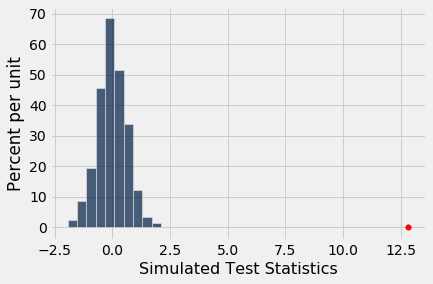

In [52]:
chol_simulated_table.hist()
plots.scatter(chol_observed_statistic, 0, color='red', s=30)

**Question 7:** Without calculating any p-values, can we conclude from the test that the change in diet **causes** a larger percentage difference in serum cholesterol levels over time? Explain your answer. 

Yes. One can conclude that the change in diet causes a larger percentage difference in cholesterol levels over time. Because the observed test statistic is so far from the bulk of test statistics in the right direction, where the values are larger, the null is disproved, because the model under the null does not match the observed, and because the test stat, controlled cholesterol changes-diet cholesterol changes, implies that large values for the test stat, which indicate very negative values for diet cholesterol changes, support the alternative hypothesis.

**Question 8:** Assign `cholesterol_conclusion` to 1, 2, or 3, where the number chosen corresponds to the conclusion that we can make from this study.

1. The results of this analysis indicate that changing saturated fats to polyunsaturated fats in a person's diet decreases their serum cholesterol levels.  
2. The results of this analysis indicate that changing saturated fats to polyunsaturated fats in a person's diet does not decrease their serum cholesterol levels.  
3. The results of this analysis do not allow us to draw any conclusions about the effect of changing saturated fats to polyunsaturated fats in a person's diet on their serum cholesterol levels.

In [53]:
cholesterol_conclusion = 1
cholesterol_conclusion

1

In [54]:
_ = ok.grade('q4_1_8')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



### Section 2: Reducing Death Rates

In the previous section, we made a decision on whether dietary change affects the change in serum cholesterol levels. We have not yet, however, explored how the change in diet affects death rates among the subjects. To explore this, we move our attention to the `minnesota_data` table. 

In [55]:
minnesota_data

Age,Condition,Died,Participated
0-34,Diet,True,True
0-34,Diet,True,True
0-34,Diet,True,True
0-34,Diet,False,True
0-34,Diet,False,True
0-34,Diet,False,True
0-34,Diet,False,True
0-34,Diet,False,True
0-34,Diet,False,True
0-34,Diet,False,True


**Question 1:** Set up a null hypothesis and an alternative hypothesis that we can use to answer whether or not the unsaturated fat diet causes different rates of death in the two groups.

**Null Hypothesis:** An unsaturated diet does not cause different rates of death from that of the control, and any difference is just chance.

**Alternative Hypothesis:**  An unsaturated diet does cause different rates of death from that of the control group.

**Question 2:** Create a table named `summed_mn_data`, with three columns and two rows. The three columns should be "Condition", "Died sum", and "Participated sum". There should be one row for the diet group and one row for the control group, and each row should encode the total number of people who participated in that group and the total number of people who died in that group. 

In [56]:
np.count_nonzero(minnesota_data.column(1)=="Control")

4738

In [60]:
Diet_mn

Age,Condition,Died,Participated
0-34,Diet,True,True
0-34,Diet,True,True
0-34,Diet,True,True
0-34,Diet,False,True
0-34,Diet,False,True
0-34,Diet,False,True
0-34,Diet,False,True
0-34,Diet,False,True
0-34,Diet,False,True
0-34,Diet,False,True


In [61]:
Diet_mn=minnesota_data.where('Condition', are.equal_to('Diet'))
Diet_dead=np.count_nonzero(Diet_mn.column('Died'))
Diet_part=np.count_nonzero(Diet_mn.column('Participated'))

Control_mn=minnesota_data.where('Condition', are.equal_to('Control'))
Control_dead=np.count_nonzero(Control_mn.column('Died'))
Control_part=np.count_nonzero(Control_mn.column('Participated'))

summed_mn_data = minnesota_data.group('Condition').drop('count').with_columns('Died sum',make_array(Control_dead,Diet_dead),'Participated sum', make_array(Control_part,Diet_part))
summed_mn_data

Condition,Died sum,Participated sum
Control,222,4738
Diet,245,4685


In [62]:
_ = ok.grade('q4_2_2')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 3:** In thinking of a test statistic, one researcher decides that the absolute difference in the number of people who died in the control group and the number of people who died in the diet group is a sufficient test statistic. Give one **specific** reason why this test statistic will not work. 

The absolute difference is not adequate because there are different numbers of people in each group. If one group has more or fewer people than the other group, it is natural that the amount of people in the group that died will be different. For example, a group with 1000 people will have more deaths over a set amount of time than a group of ten people.

To combat the problem above, we instead decide to use the the absolute difference in hazard rates between the two groups as our test statistic. The *hazard rate* is defined as the proportion of people who died in a specific group out of the total number who participated in the study from that group. 

**Question 4:** Define a new table `summed_mn_hazard_data` that contains the columns of `summed_mn_data` along with an additional column, `Hazard Rate`, that contains the hazard rates for each condition.

In [63]:
summed_mn_hazard_data =summed_mn_data.with_column('Hazard Rate', summed_mn_data.column(1)/summed_mn_data.column(2))
summed_mn_hazard_data

Condition,Died sum,Participated sum,Hazard Rate
Control,222,4738,0.0468552
Diet,245,4685,0.0522946


In [64]:
_ = ok.grade('q4_2_4')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 5:** Define a function `compute_hazard_difference` which takes in a table like `summed_mn_hazard_data` and returns the absolute difference between the hazard rates of the control group and the diet group. Use it to get the observed test statistic and assign it to `death_rate_observed_statistic`.

In [65]:
def compute_hazard_difference(tbl):
    return abs(tbl.column('Hazard Rate').item(1)-tbl.column('Hazard Rate').item(0))

death_rate_observed_statistic = compute_hazard_difference(summed_mn_hazard_data)
death_rate_observed_statistic

0.005439343927004493

In [66]:
_ = ok.grade('q4_2_5')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 6:** We are now in a position to run a hypothesis test to help differentiate between our two hypothesis using our data. Define a function `test` which takes in a table like `minnesota_data`. It simulates samples and calculates the rate differences for these samples under the null hypothesis 500 times, and uses them to return a P-Value with respect to our observed data. Note that your function should use the values in `t`, and should not refer to `minnesota_table`!

*Hint:* This is a very long, involved problem. Start by outlining the steps you'll need to execute in this function and address each separately. Small steps and comments will be very helpful. You've already written a lot of key steps!


Note: Your code might take a long time to run.

In [67]:
minnesota_data

Age,Condition,Died,Participated
0-34,Diet,True,True
0-34,Diet,True,True
0-34,Diet,True,True
0-34,Diet,False,True
0-34,Diet,False,True
0-34,Diet,False,True
0-34,Diet,False,True
0-34,Diet,False,True
0-34,Diet,False,True
0-34,Diet,False,True


In [68]:
example_control=minnesota_data.where('Condition', are.equal_to('Control'))
example_control

Age,Condition,Died,Participated
0-34,Control,True,True
0-34,Control,True,True
0-34,Control,True,True
0-34,Control,True,True
0-34,Control,True,True
0-34,Control,True,True
0-34,Control,True,True
0-34,Control,False,True
0-34,Control,False,True
0-34,Control,False,True


In [69]:
example_diet=minnesota_data.where('Condition', are.equal_to('Diet'))
example_diet

Age,Condition,Died,Participated
0-34,Diet,True,True
0-34,Diet,True,True
0-34,Diet,True,True
0-34,Diet,False,True
0-34,Diet,False,True
0-34,Diet,False,True
0-34,Diet,False,True
0-34,Diet,False,True
0-34,Diet,False,True
0-34,Diet,False,True


In [70]:
example_control_deaths=np.count_nonzero(example_control.column('Died'))
example_control_deaths

222

In [71]:
example_diet_deaths=np.count_nonzero(example_diet.column('Died'))
example_diet_deaths

245

In [72]:
example_control_hazard=example_control_deaths/np.count_nonzero(example_control.column('Participated'))
example_control_hazard

0.04685521317011397

In [73]:
example_diet_hazard=example_diet_deaths/np.count_nonzero(example_diet.column('Participated'))
example_diet_hazard

0.052294557097118465

In [74]:
abs(example_control_hazard-example_diet_hazard)

0.005439343927004493

In [75]:
minnesota_data.drop('Age').group('Condition',sum)

Condition,Died sum,Participated sum
Control,222,4738
Diet,245,4685


In [77]:
minnesota_data.drop('Age').group('Condition',sum)

Condition,Died sum,Participated sum
Control,222,4738
Diet,245,4685


In [79]:
minnesota_data

Age,Condition,Died,Participated
0-34,Diet,True,True
0-34,Diet,True,True
0-34,Diet,True,True
0-34,Diet,False,True
0-34,Diet,False,True
0-34,Diet,False,True
0-34,Diet,False,True
0-34,Diet,False,True
0-34,Diet,False,True
0-34,Diet,False,True


In [87]:
#Need to, for a function with the same columns and rows as minnesota_data, find the observed difference between death rates for the two categories.
#then, need to run 500 iterations of the test statistic under the null via shuffling, and compare the two for a P-value
# t_control=t.where('Condition', are.equal_to('Control'))
#t_diet=t.where('Condition', are.equal_to('Diet'))
#t_control_deaths=np.count_nonzero(t_control.column('Died'))
#t_diet_deaths=np.count_nonzero(t_diet.column('Died'))
#t_control_hazard=t_control_deaths/np.count_nonzero(t_control.column('Participated'))
#t_diet_hazard=t_diet_deaths/np.count_nonzero(t_diet.column('Participated'))
#t_with_hazards=t.group('Condition').with_column('Hazard Rate', make_array(t_control_hazard,t_diet_hazard))
#t_observed_stat=compute_hazard_difference(t_with_hazards)
def test(t):
    summed_table=t.drop('Age').group('Condition',sum)
    t_hazards=summed_table.column('Died sum')/summed_table.column('Participated sum')
    t_with_hazards=summed_table.with_column('Hazard Rate', t_hazards)
    
    t_observed_stat=compute_hazard_difference(t_with_hazards)
    
    test_aggregate=make_array()
    for i in np.arange(500):
        shuffled_deaths=t.select('Died').sample(with_replacement=False).column('Died')
        shuffled_t=t.drop('Died').with_column('Died',shuffled_deaths)
        summed_shuffled_t=shuffled_t.group('Condition', sum)
        shuffled_hazards=summed_shuffled_t.column('Died sum')/summed_shuffled_t.column('Participated sum')
        shuffled_t_with_hazard=summed_shuffled_t.with_column('Hazard Rate', shuffled_hazards)
        shuffled_test=compute_hazard_difference(shuffled_t_with_hazard)
        test_aggregate=np.append(test_aggregate, shuffled_test)
    p_value=np.count_nonzero(test_aggregate>=t_observed_stat)/500
    return p_value
our_p_value = test(minnesota_data)
our_p_value

0.228

In [86]:
_ = ok.grade('q4_2_6')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 7:** Using the P-Value above, what can we conclude about if the change in diet causes a difference in death rate? Assume a normal p-value cutoff of .05. 

The change in diet does not cause a significant difference in death rate. The p-value, at .228, was far larger than the cutoff of .05. Thus, the null is not rejected, because the observed data is consistent with the null.

## Part 5: Conclusion

We've almost made it to the end of this analysis. You, as an investigative data scientist, have explored the world's leading causes of death, identified the largest cause of death known to us in the last century, and looked at one of the most important data sets that explains what leads to that cause of death. We've recreated Dr. Frantz's data, run our own experiments, and examined important external factors. It's now time to reflect on what we've discovered.

**Question 1:** In about 3-5 sentences, explain what you have learned throughout this project. Does replacing saturated fats with unsaturated fats cause a change in serum cholesterol? Does it cause a different death rate? What other factors are important to consider? 

Through the project, we learned that replacing unsaturated fats with saturated fats significantly reduces serum cholesterol percentage levels. This is justified by the Minnesota Coronary Experiment's use of randomly splitting hospital paitents, thus ensuring the two groups are roughly the same, and making sure the test was blind, and there was no way to taint the treatment by not sticking to the diet. Thus, the treatment has been isolated and is probably the only major difference between the control and treatment group. Then, the fact that the observed test statistic disproves the null and supports the alternative, that an unsaturated diet does decrease serum cholesterol percentages compared to a saturated fat diet, means that there is adequate evidence to prove that replacing saturated fats with unsaturated fats does cause a change in serum cholesterol levels. 
However, there is not enough evidence to prove that it affects death rates. An AB test, which would have checked if the two data sets, control and treatment, came from the same source, concluded that the two rates are similar enough, through a difference in hazard rates, that the two have similar death rates, such that chance could have caused the difference.
Other factors that are important to consider are other reasons that could have killed people in the study, which took place in a hospital where the test subjects were already less healthy than the general population. Another factor to consider is in testing what else was in the food. There could have been other factors in the food, such as high sugar content, that might have been endemic to one type of fat but not the other.

Congratulations! You have completed your own large scale case study into cause and effect surrounding one of the world's deadliest killers: cardiovascular disease. Your investigation you has taken you through two important data sets and across decades of medical research.

Run the next cell to submit the project. 

In [ ]:
_ = ok.submit()

### Further reading

If you're interested in learning more, you can check out these articles:

* [Origin story of the Framingham Heart Study](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1449227/)
* [Recent paper about Minnesota findings](https://www.bmj.com/content/353/bmj.i1246)
* [National Diet-Heart Study initial report](https://jamanetwork.com/journals/jama/article-abstract/666261)
* [National Diet-Heart Study final report](http://www.epi.umn.edu/cvdepi/study-synopsis/national-diet-heart-study/)

In [218]:
# For your convenience, you can run this cell to run all the tests at once!
import os
print("Running all tests...")
_ = [ok.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q')]
print("Finished running all tests.")

Running all tests...
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running t